<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Taller_de_Programacion/TF_TPP_ORTEGA_YUBRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

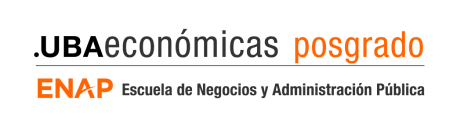

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

#### Taller de Programación - Python - **Segunda Evaluación**

- Natalia SALABERRY

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


### Activando módulos necesarios

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

### **1**) Obtención de datos y creación del dataframe

*Importar a su cuaderno del Colaboratory el archivo bank.zip que se encuentra en el repositorio de UCI en el siguiente link: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/*

#### Obtención de datos

In [2]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/main/Gestion_y_Procesamiento_BD/"
archivo="bank-full.csv"

#### Creación del dataframe

In [3]:
bankfull = pd.read_csv(url+archivo)

### **2**) Visualización del dataframe

*Utilizando el conjunto de datos bank-full.csv se solicita obtenga las dimensiones del mismo.*

In [4]:
bankfull

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


El dataframe tiene una dimensión de 45211 filas y 17 columnas

In [5]:
bankfull.shape

(45211, 17)

El dataframe tiene un tamaño de 768587 datos, el resultante de multiplicar 45211 filas por 17 columnas

In [6]:
bankfull.size

768587

### **3**) Profiling Reporte

*Realiza un Profiling Reporte. Con el resultado obtenido elabore una descripción inicial del conjunto de datos en su informe.*

#### Actualizando el módulo pandas-profiling

In [7]:
#pip install -U pandas-profiling

#### Activando módulo necesario

In [8]:
from pandas_profiling import ProfileReport

In [9]:
#!jupyter nbextension enable --py widgetsnbextension

#### Generando el Profiling Reporte

In [10]:
#ProfileReport(bankfull)

### **4**) Preparación de los datos

*Convierta en categorías numéricas todos los campos que son String. Para esto, en cada caso debe obtener las categorías únicas y luego poder reemplazar los String por números. En el caso que cuente con un valor "unknown" impute None.
Finalmente, verifique en que campos existen valores faltantes*

In [11]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Reemplazando unknown por none

##### Verificando la palabra "unknown" por columna

###### Columna job

In [12]:
bankfull.query("job =='unknown'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,unknown,no
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,unknown,no
1072,29,unknown,single,primary,no,50,yes,no,unknown,7,may,50,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,unknown,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,unknown,yes
44742,64,unknown,married,unknown,no,2799,no,no,telephone,9,sep,378,4,-1,0,unknown,no
44970,28,unknown,single,unknown,no,326,no,no,cellular,11,oct,450,1,231,1,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


***Para la columna "job" tenemos 288 valores "unknown"***

###### Columna education

In [13]:
bankfull.query("education=='unknown'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,unknown,no,3308,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no


***Para la columna "education" tenemos 1857 valores "unknown"***

###### Columna contact

In [14]:
bankfull.query("contact=='unknown'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,self-employed,single,secondary,no,1031,no,no,unknown,20,oct,7,1,-1,0,unknown,no
45062,58,retired,married,primary,no,742,no,no,unknown,20,oct,5,1,-1,0,unknown,no
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,-1,0,unknown,no
45135,53,blue-collar,married,primary,no,1294,no,no,unknown,28,oct,71,1,-1,0,unknown,no


***Para la columna "contact" tenemos 13020 valores "unknown"***

###### Columna poutcome

In [15]:
bankfull.query("poutcome=='unknown'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


***Para la columna "poutcome" tenemos 36959 valores "unknown"***

##### Reemplazando la palabra "unknown" por "None"

Las columnas a reemplazar la palabra "unknown" por "None" son:
- job
- education
- contact
- poutcome

In [16]:
bankfull.replace({"unknown":"None"}, inplace=True)

Verificando que no está la palabra "unknown"

In [17]:
bankfull.query("job=='unknown'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [18]:
bankfull.query("education=='unknown'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [19]:
bankfull.query("contact=='unknown'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [20]:
bankfull.query("poutcome=='unknown'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


Verificando la palabra "None"

In [21]:
bankfull.query("job =='None'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
216,47,None,married,None,no,28,no,no,None,5,may,338,2,-1,0,None,no
354,59,None,divorced,None,no,27,no,no,None,5,may,347,3,-1,0,None,no
876,37,None,single,None,no,414,yes,no,None,7,may,131,1,-1,0,None,no
1072,29,None,single,primary,no,50,yes,no,None,7,may,50,2,-1,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,None,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,None,yes
44742,64,None,married,None,no,2799,no,no,telephone,9,sep,378,4,-1,0,None,no
44970,28,None,single,None,no,326,no,no,cellular,11,oct,450,1,231,1,success,yes
45141,77,None,married,None,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


In [22]:
bankfull.query("education=='None'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
13,58,technician,married,None,no,71,yes,no,None,5,may,71,1,-1,0,None,no
16,45,admin.,single,None,no,13,yes,no,None,5,may,98,1,-1,0,None,no
42,60,blue-collar,married,None,no,104,yes,no,None,5,may,22,1,-1,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,None,no,3308,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,77,None,married,None,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45150,65,management,married,None,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45158,34,student,single,None,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no


In [23]:
bankfull.query("contact=='None'", inplace=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,self-employed,single,secondary,no,1031,no,no,None,20,oct,7,1,-1,0,None,no
45062,58,retired,married,primary,no,742,no,no,None,20,oct,5,1,-1,0,None,no
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,None,26,oct,17,1,-1,0,None,no
45135,53,blue-collar,married,primary,no,1294,no,no,None,28,oct,71,1,-1,0,None,no


In [24]:
bankfull.query("poutcome=='None'")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,None,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,None,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,None,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,None,yes


#### Convirtiendo string por números

##### Habilitando el modulo necesario

In [25]:
import sklearn 
from sklearn.preprocessing import LabelEncoder

##### Convertiendo string

In [26]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Las columnas a convertir string con LabelEncoder son:
- job
- marital
- education
- default
- housing
- loan
- contact
- poutcome
- y

La columna month se convertirá luego

In [27]:
convertir = LabelEncoder()

Aplicando la función str para LabelEncoder

In [28]:
bankfull.job = bankfull.job.apply(str)
bankfull.marital = bankfull.marital.apply(str)
bankfull.education = bankfull.education.apply(str)
bankfull.default = bankfull.default.apply(str)
bankfull.housing = bankfull.housing.apply(str)
bankfull.loan = bankfull.loan.apply(str)
bankfull.contact = bankfull.contact.apply(str)
bankfull.month = bankfull.month.apply(str)
bankfull.poutcome = bankfull.poutcome.apply(str)
bankfull.y = bankfull.y.apply(str)

Convirtiendo

In [29]:
bankfull.insert(2,column="numjob",value=convertir.fit_transform(bankfull.job))
bankfull.insert(4,column="nummarital",value=convertir.fit_transform(bankfull.marital))
bankfull.insert(6,column="numeducation",value=convertir.fit_transform(bankfull.education))
bankfull.insert(8,column="numdefault",value=convertir.fit_transform(bankfull.default))
bankfull.insert(11,column="numhousing",value=convertir.fit_transform(bankfull.housing))
bankfull.insert(13,column="numloan",value=convertir.fit_transform(bankfull.loan))
bankfull.insert(15,column="numcontact",value=convertir.fit_transform(bankfull.contact))
bankfull.insert(23,column="numpoutcome",value=convertir.fit_transform(bankfull.poutcome))
bankfull.insert(25,column="numy",value=convertir.fit_transform(bankfull.y))

In [30]:
bankfull

,age,job,numjob,marital,nummarital,education,numeducation,default,numdefault,balance,housing,numhousing,loan,numloan,contact,numcontact,day,month,duration,campaign,pdays,previous,poutcome,numpoutcome,y,numy
0,58,management,5,married,1,tertiary,3,no,0,2143,yes,1,no,0,None,0,5,may,261,1,-1,0,None,0,no,0
1,44,technician,10,single,2,secondary,2,no,0,29,yes,1,no,0,None,0,5,may,151,1,-1,0,None,0,no,0
2,33,entrepreneur,3,married,1,secondary,2,no,0,2,yes,1,yes,1,None,0,5,may,76,1,-1,0,None,0,no,0
3,47,blue-collar,2,married,1,None,0,no,0,1506,yes,1,no,0,None,0,5,may,92,1,-1,0,None,0,no,0
4,33,None,0,single,2,None,0,no,0,1,no,0,no,0,None,0,5,may,198,1,-1,0,None,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,10,married,1,tertiary,3,no,0,825,no,0,no,0,cellular,1,17,nov,977,3,-1,0,None,0,yes,1
45207,71,retired,6,divorced,0,primary,1,no,0,1729,no,0,no,0,cellular,1,17,nov,456,2,-1,0,None,0,yes,1
45208,72,retired,6,married,1,secondary,2,no,0,5715,no,0,no,0,cellular,1,17,nov,1127,5,184,3,success,3,yes,1
45209,57,blue-collar,2,married,1,secondary,2,no,0,668,no,0,no,0,telephone,2,17,nov,508,4,-1,0,None,0,no,0


Constatar los valores unicos de la columna month

In [31]:
bankfull.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

Creando función para reemplazar los valores del mes por el número que corresponde

In [32]:
def mes(month):
  if month == "jan":
    return int("1")
  elif month == "feb":
    return int("2")
  elif month == "mar":
    return int("3")
  elif month == "apr":
    return int("4")
  elif month == "may":
    return int("5")
  elif month == "jun":
    return int("6")
  elif month == "jul":
    return int("7")
  elif month == "aug":
    return int("8")
  elif month == "sep":
    return int("9")
  elif month == "oct":
    return int("10")
  elif month == "nov":
    return int("11")
  else: 
    return int("12")

In [33]:
bankfull.month = bankfull.month.apply(mes)

In [34]:
bankfull

,age,job,numjob,marital,nummarital,education,numeducation,default,numdefault,balance,housing,numhousing,loan,numloan,contact,numcontact,day,month,duration,campaign,pdays,previous,poutcome,numpoutcome,y,numy
0,58,management,5,married,1,tertiary,3,no,0,2143,yes,1,no,0,None,0,5,5,261,1,-1,0,None,0,no,0
1,44,technician,10,single,2,secondary,2,no,0,29,yes,1,no,0,None,0,5,5,151,1,-1,0,None,0,no,0
2,33,entrepreneur,3,married,1,secondary,2,no,0,2,yes,1,yes,1,None,0,5,5,76,1,-1,0,None,0,no,0
3,47,blue-collar,2,married,1,None,0,no,0,1506,yes,1,no,0,None,0,5,5,92,1,-1,0,None,0,no,0
4,33,None,0,single,2,None,0,no,0,1,no,0,no,0,None,0,5,5,198,1,-1,0,None,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,10,married,1,tertiary,3,no,0,825,no,0,no,0,cellular,1,17,11,977,3,-1,0,None,0,yes,1
45207,71,retired,6,divorced,0,primary,1,no,0,1729,no,0,no,0,cellular,1,17,11,456,2,-1,0,None,0,yes,1
45208,72,retired,6,married,1,secondary,2,no,0,5715,no,0,no,0,cellular,1,17,11,1127,5,184,3,success,3,yes,1
45209,57,blue-collar,2,married,1,secondary,2,no,0,668,no,0,no,0,telephone,2,17,11,508,4,-1,0,None,0,no,0


In [35]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   numjob        45211 non-null  int64 
 3   marital       45211 non-null  object
 4   nummarital    45211 non-null  int64 
 5   education     45211 non-null  object
 6   numeducation  45211 non-null  int64 
 7   default       45211 non-null  object
 8   numdefault    45211 non-null  int64 
 9   balance       45211 non-null  int64 
 10  housing       45211 non-null  object
 11  numhousing    45211 non-null  int64 
 12  loan          45211 non-null  object
 13  numloan       45211 non-null  int64 
 14  contact       45211 non-null  object
 15  numcontact    45211 non-null  int64 
 16  day           45211 non-null  int64 
 17  month         45211 non-null  int64 
 18  duration      45211 non-null  int64 
 19  camp

### **5**) Preparación de los datos

*En los casos de los campos “job”, “education” y “contact” que tenían un valor "unknown" y reemplazó por None, realice una imputación del vecino más cercano usando el criterio de distancia. En el caso del campo “poutcome” impute el valor más frecuente. Al finalizar, verifique que en toda su base de datos no haya valores perdidos.*

<font color="#ff8000">
<h6>
<b>Nota aclaratoria:</b> en el presente punto se solicita que los campos "job", "education", "contact" y "poutcome" se realicen imputaciones, las mismas se realizaran en las columnas numéricas, luego las columnas con cadenas de caracteres se eliminaran, para completar la consigna del punto 4)

</font>

#### Imputación del vecino más cercano

#####Instalando la librería requerida

In [36]:
!pip install missingpy

##### Habilitando la librería

In [37]:
from missingpy import KNNImputer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



##### Realizando imputación del vecino más cercano

In [38]:
imputacion = KNNImputer(n_neighbors=2, 
                        weights="distance", 
                        missing_values=0)
imputacion

KNNImputer(col_max_missing=0.8, copy=True, metric='masked_euclidean',
           missing_values=0, n_neighbors=2, row_max_missing=0.5,
           weights='distance')

###### Columna job

In [39]:
bankfull.numjob[4]

0

In [40]:
bankfull.numjob = imputacion.fit_transform(bankfull[["numjob"]])
bankfull.numjob[4]

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:224: UserWarning:

There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:282: UserWarning:

There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.



5.297063864835385

In [41]:
bankfull.numjob = bankfull.numjob.apply(lambda x: round(x, 3))
bankfull.numjob[4]

5.297

###### Columna education

In [42]:
bankfull.numeducation[3]

0

In [43]:
bankfull.numeducation = imputacion.fit_transform(bankfull[["numeducation"]])
bankfull.numeducation[3]

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:224: UserWarning:

There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:282: UserWarning:

There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.



2.148775199520229

In [44]:
bankfull.numeducation = bankfull.numeducation.apply(lambda x: round(x, 3))
bankfull.numeducation[3]

2.149

###### Columna contact

In [45]:
bankfull.numcontact[0]

0

In [46]:
bankfull.numcontact = imputacion.fit_transform(bankfull[["numcontact"]])
bankfull.numcontact[0]

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:224: UserWarning:

There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:282: UserWarning:

There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.



1.0902736789785965

In [47]:
bankfull.numcontact = bankfull.numcontact.apply(lambda x: round(x, 3))
bankfull.numcontact[0]

1.09

#### Imputación del valor mas frecuente

In [48]:
bankfull.head(7)

,age,job,numjob,marital,nummarital,education,numeducation,default,numdefault,balance,housing,numhousing,loan,numloan,contact,numcontact,day,month,duration,campaign,pdays,previous,poutcome,numpoutcome,y,numy
0,58,management,5.000,married,1,tertiary,3.000,no,0,2143,yes,1,no,0,None,1.09,5,5,261,1,-1,0,None,0,no,0
1,44,technician,10.000,single,2,secondary,2.000,no,0,29,yes,1,no,0,None,1.09,5,5,151,1,-1,0,None,0,no,0
2,33,entrepreneur,3.000,married,1,secondary,2.000,no,0,2,yes,1,yes,1,None,1.09,5,5,76,1,-1,0,None,0,no,0
3,47,blue-collar,2.000,married,1,None,2.149,no,0,1506,yes,1,no,0,None,1.09,5,5,92,1,-1,0,None,0,no,0
4,33,None,5.297,single,2,None,2.149,no,0,1,no,0,no,0,None,1.09,5,5,198,1,-1,0,None,0,no,0
5,35,management,5.000,married,1,tertiary,3.000,no,0,231,yes,1,no,0,None,1.09,5,5,139,1,-1,0,None,0,no,0
6,28,management,5.000,single,2,tertiary,3.000,no,0,447,yes,1,yes,1,None,1.09,5,5,217,1,-1,0,None,0,no,0


##### Habilitando la librería

In [49]:
from sklearn.impute import SimpleImputer

##### Realizando imputación del valor mas frecuente

In [50]:
valorfrecuente = SimpleImputer(strategy="most_frequent", missing_values=0)
valorfrecuente

SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=0,
              strategy='most_frequent', verbose=0)

###### Columna poutcome

In [51]:
bankfull.numpoutcome[0]

0

In [52]:
bankfull.numpoutcome = valorfrecuente.fit_transform(bankfull[["numpoutcome"]])
bankfull.numpoutcome[0]

1

#### Verificando valores faltantes

Previo a la verificacion, se deja solo en el dataframe columnas numéricas de acuerdo a lo solicitado en el punto 4)

In [53]:
bankfull.drop(columns=["job",
                       "marital",
                       "education",
                       "default",
                       "housing",
                       "loan",
                       "contact",
                       "poutcome",
                       "y"], 
              axis=1, inplace=True)

In [54]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           45211 non-null  int64  
 1   numjob        45211 non-null  float64
 2   nummarital    45211 non-null  int64  
 3   numeducation  45211 non-null  float64
 4   numdefault    45211 non-null  int64  
 5   balance       45211 non-null  int64  
 6   numhousing    45211 non-null  int64  
 7   numloan       45211 non-null  int64  
 8   numcontact    45211 non-null  float64
 9   day           45211 non-null  int64  
 10  month         45211 non-null  int64  
 11  duration      45211 non-null  int64  
 12  campaign      45211 non-null  int64  
 13  pdays         45211 non-null  int64  
 14  previous      45211 non-null  int64  
 15  numpoutcome   45211 non-null  int64  
 16  numy          45211 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 5.9 MB


In [55]:
bankfull = bankfull.rename(columns={"numjob":"job",
                                    "nummarital":"marital",
                                    "numeducation":"education",
                                    "numdefault":"default",
                                    "numhousing":"housing",
                                    "numloan":"loan",
                                    "numcontact":"contact",
                                    "numpoutcome":"poutcome",
                                    "numy":"y"})

Ahora se procede a la verificacion

In [56]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  float64
 2   marital    45211 non-null  int64  
 3   education  45211 non-null  float64
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    45211 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int64  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int64  
 16  y          45211 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 5.9 MB


Se verifica que en el dataframe no existen valores nulos.

### **6**) Exportación de los datos, y EDA

*Exporte su conjunto de datos (solo deje especificado el código en su cuaderno colab verificando que funciona para que otro pueda ejecutarlo). Si lo considera conveniente puede realizar estadísticas descriptivas y alguna visualización para extraer conclusiones que luego volcará en su informe.*

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#####Exportando los datos

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bankfull.to_csv("/content/drive/bankfull.csv")

#####Análisis exploratorio de los datos

######Estadística descriptiva

In [58]:
bankfull.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,5.297063,1.167725,2.148784,0.018027,1362.272058,0.555838,0.160226,1.090195,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,1.107540,0.116985
std,10.618762,3.228915,0.608230,0.651549,0.133049,3044.765829,0.496878,0.366820,0.241817,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.403511,0.321406
min,18.000000,1.000000,0.000000,1.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000
25%,33.000000,2.000000,1.000000,2.000000,0.000000,72.000000,0.000000,0.000000,1.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,1.000000,0.000000
50%,39.000000,5.000000,1.000000,2.000000,0.000000,448.000000,1.000000,0.000000,1.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,1.000000,0.000000
75%,48.000000,8.000000,2.000000,3.000000,0.000000,1428.000000,1.000000,0.000000,1.090000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,1.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


######Matriz de correlación

In [60]:
bankfullcorrelacion = bankfull.corr()
bankfullcorrelacion

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.030455,-0.403240,-0.161895,-0.017879,0.097783,-0.185513,-0.015655,0.169373,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.020402,0.025155
job,-0.030455,1.000000,0.062683,0.182924,-0.005844,0.016697,-0.114670,-0.028175,-0.022123,0.025015,0.042176,0.005863,0.004604,-0.022249,0.000575,0.023679,0.040942
marital,-0.403240,0.062683,1.000000,0.119737,-0.007023,0.002122,-0.016096,-0.046893,-0.026429,-0.005261,-0.050938,0.011852,-0.008994,0.019172,0.014973,0.030059,0.045588
education,-0.161895,0.182924,0.119737,1.000000,-0.011607,0.067760,-0.077395,-0.027577,-0.092073,0.025963,0.071328,0.002606,0.003965,0.003954,0.024826,0.049506,0.069250
default,-0.017879,-0.005844,-0.007023,-0.011607,1.000000,-0.066745,-0.006025,0.077234,-0.014093,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.027870,-0.022419
balance,0.097783,0.016697,0.002122,0.067760,-0.066745,1.000000,-0.068768,-0.084350,0.032246,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.035540,0.052838
housing,-0.185513,-0.114670,-0.016096,-0.077395,-0.006025,-0.068768,1.000000,0.041323,-0.046845,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.061944,-0.139173
loan,-0.015655,-0.028175,-0.046893,-0.027577,0.077234,-0.084350,0.041323,1.000000,-0.014585,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.052306,-0.068185
contact,0.169373,-0.022123,-0.026429,-0.092073,-0.014093,0.032246,-0.046845,-0.014585,1.000000,0.018240,0.007405,-0.025954,0.055478,-0.025406,0.002514,-0.006786,-0.011196
day,-0.009120,0.025015,-0.005261,0.025963,0.009424,0.004503,-0.027982,0.011370,0.018240,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.043147,-0.028348


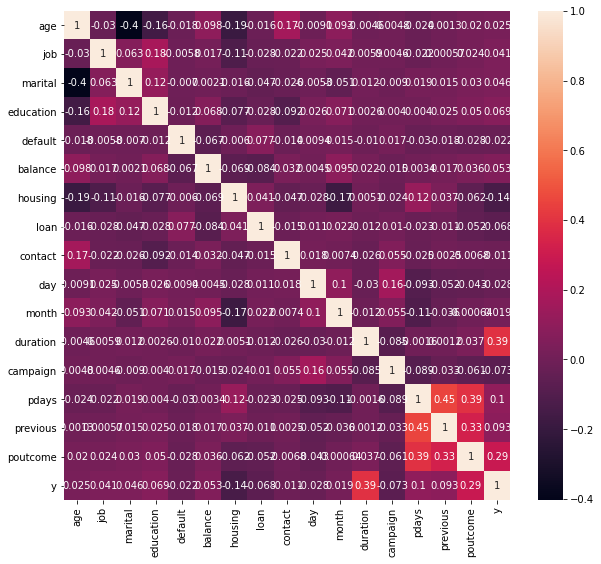

In [63]:
plt.figure(figsize=(10,9))
sns.heatmap(bankfullcorrelacion, 
            annot=True)

plt.show()

######Graficos

In [67]:
fig = px.scatter(bankfull, x="age", 
                y="balance",
                template="simple_white",
                color="y")
fig.show()